## plot_temperature_data.ipynb
This notebook reads some temperature data from several location in Alaska and plots the daily maximum temperature
for each location. The data was downloaded from https://data.gov

In [1]:
from matplotlib import pyplot
import pandas
import numpy as np

# Function to read header file.
def ReadHeaders(headerfile):
    '''
    Returns column headers given a header file.
    '''
    with open(headerfile) as ifs:
        ifs.readline()  # Read and discard first row.
        headers = ifs.readline().strip().split(' ')
    return headers

def ReadData(headers,datafiles):
    '''
    Reads the T_DAILY_MAX value from each data file and returns a 
    data frame with those values, with columns labeled by the place 
    name.
    '''
    # Read the subsequent files into a data frame.
    final_dataset = None
    for datafile in datafiles:
        # Derive the place name from the data file name.
        fields = datafile.split('_')
        placename = '_'.join( fields[1:len(fields)-2] )
        # Read the data file into a data frame.
        dataset=pandas.read_table(datafile,names=[placename],header=None,sep='\s+',usecols=[5],dtype=np.float64)
        # Replace missing values with None.
        dataset[dataset==-9999.0]=None

        # Add this locations data to the growing final data set.
        if final_dataset is None:
            final_dataset = dataset
        else:
            final_dataset.insert(0,placename,dataset)
    return final_dataset



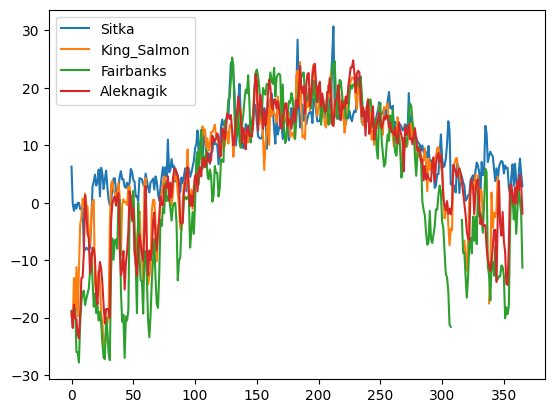

In [3]:
# Read the column headers.
headers = ReadHeaders('HEADERS.txt')
# Read the data files.
datafiles=[
    'CRND0103-2020-AK_Aleknagik_1_NNE.txt',
    'CRND0103-2020-AK_Fairbanks_11_NE.txt',
    'CRND0103-2020-AK_King_Salmon_42_SE.txt',
    'CRND0103-2020-AK_Sitka_1_NE.txt',
    ]
dataset=ReadData(headers,datafiles)
# Plot the data.
# print(dataset.columns)
for location in dataset.columns:
    pyplot.plot(dataset[location],label=location)
pyplot.legend()
# Display the plot:
pyplot.show()
